In [1]:
%matplotlib inline
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

from linearmodels import PanelOLS

In [2]:
df = pd.read_csv('data.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,team,player,position,tour,place,prize,start,end,startelo32,startelo64,...,endelo32,endelo64,endglickorating,endglickomu,endglickophi,endglickosigma,endglicko2rating,endglicko2mu,endglicko2phi,endglicko2sigma
0,Infamous,Kotar? Hayama,1,Galaxy Battles II: Emerging Worlds,7,"$20,000",2018-01-19,2018-01-21,1116.266143,1172.69492,...,1114.677102,1170.334653,1646.254466,1840.23761,NaN,77.593258,1596.919637,1728.907874,52.795295,NaN
1,Infamous,Papita,2,Galaxy Battles II: Emerging Worlds,7,"$20,000",2018-01-19,2018-01-21,1116.266143,1172.69492,...,1114.677102,1170.334653,1646.254466,1840.23761,NaN,77.593258,1596.919637,1728.907874,52.795295,NaN
2,Infamous,StingeR,3,Galaxy Battles II: Emerging Worlds,7,"$20,000",2018-01-19,2018-01-21,1116.266143,1172.69492,...,1114.677102,1170.334653,1646.254466,1840.23761,NaN,77.593258,1596.919637,1728.907874,52.795295,NaN
3,Infamous,Scofield,4,Galaxy Battles II: Emerging Worlds,7,"$20,000",2018-01-19,2018-01-21,1116.266143,1172.69492,...,1114.677102,1170.334653,1646.254466,1840.23761,NaN,77.593258,1596.919637,1728.907874,52.795295,NaN
4,Infamous,Masoku,5,Galaxy Battles II: Emerging Worlds,7,"$20,000",2018-01-19,2018-01-21,1116.266143,1172.69492,...,1114.677102,1170.334653,1646.254466,1840.23761,NaN,77.593258,1596.919637,1728.907874,52.795295,NaN


In [4]:
df = df.reset_index().drop('index', axis=1)

In [5]:
df['prize'] = df['prize'].replace('[\$,]', '', regex=True).astype(float)

In [6]:
df.player = df.player.replace(r'\W+', '', regex=True).str.lower()

In [7]:
df.dtypes

team                   object
player                 object
position                int64
tour                   object
place                   int64
prize                 float64
start                  object
end                    object
startelo32            float64
startelo64            float64
startglickorating     float64
startglickomu         float64
startglickophi        float64
startglickosigma      float64
startglicko2rating    float64
startglicko2mu        float64
startglicko2phi       float64
startglicko2sigma     float64
endelo32              float64
endelo64              float64
endglickorating       float64
endglickomu           float64
endglickophi          float64
endglickosigma        float64
endglicko2rating      float64
endglicko2mu          float64
endglicko2phi         float64
endglicko2sigma       float64
dtype: object

In [8]:
df.start = pd.to_datetime(df.start)
df.end = pd.to_datetime(df.end)

In [9]:
g2 = df[['team', 'player', 'position', 'tour', 'place', 'prize', 'start', 'end', 'startelo64', 'endelo64']]

In [10]:
g2 = g2.rename(columns={'startelo64': 'sg2', 'endelo64': 'eg2'})

In [11]:
g2 = g2[(g2.sg2.notnull()) & (g2.eg2.notnull())]

In [12]:
g2['gdiff'] = g2.eg2 - g2.sg2

In [13]:
g2.head()

,team,player,position,tour,place,prize,start,end,sg2,eg2,gdiff
0,Infamous,kotarhayama,1,Galaxy Battles II: Emerging Worlds,7,20000.0,2018-01-19,2018-01-21,1172.69492,1170.334653,-2.360267
1,Infamous,papita,2,Galaxy Battles II: Emerging Worlds,7,20000.0,2018-01-19,2018-01-21,1172.69492,1170.334653,-2.360267
2,Infamous,stinger,3,Galaxy Battles II: Emerging Worlds,7,20000.0,2018-01-19,2018-01-21,1172.69492,1170.334653,-2.360267
3,Infamous,scofield,4,Galaxy Battles II: Emerging Worlds,7,20000.0,2018-01-19,2018-01-21,1172.69492,1170.334653,-2.360267
4,Infamous,masoku,5,Galaxy Battles II: Emerging Worlds,7,20000.0,2018-01-19,2018-01-21,1172.69492,1170.334653,-2.360267


In [14]:
g2['lprize'] = g2['prize'].apply(np.log)

In [15]:
g2['wgdiff'] = g2['gdiff'] * g2['lprize']

In [16]:
cumsums = g2[['player', 'start', 'wgdiff']].groupby(['player', 'start']).sum().groupby(level=0).cumsum()

In [17]:
g2 = g2.set_index(['player', 'start'])

In [18]:
g2['cumg'] = cumsums

In [19]:
g2 = g2.reset_index()

In [20]:
g2[(g2['tour'] == 'The International 2017') & (g2['team'] == 'Team Liquid')][['player', 'cumg']]

,player,cumg
2355,matumbaman,4627.551028
2356,miracle,9171.942439
2357,mind_control,4627.551028
2358,gh,4426.129126
2359,kuroky,5510.526623


In [21]:
g2[g2['tour'] == 'DOTA Summit 7'][['team', 'cumg']].groupby('team').sum().sort_values('cumg', ascending=False)

,cumg
team,
Team NP,48584.518623
LGD Gaming,21762.087615
Team Secret,14739.049898
Virtus.pro,13136.438347
Digital Chaos,5811.325329
Team Empire,-1614.926298
Team VGJ,-6206.116374
Natus Vincere,-26932.443993


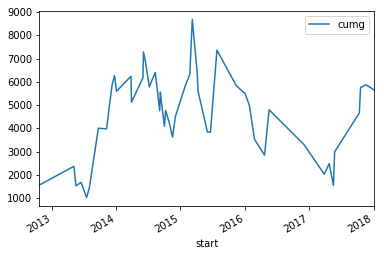

In [22]:
g2[g2['player'] == 'iceiceice'][['start', 'cumg']].set_index('start').plot()

In [23]:
g2[['player', 'cumg']].groupby('player').mean().sort_values('cumg', ascending=False)

,cumg
player,
pieliedie,12628.093698
eternalenvy,11882.031662
aui_2000,11025.051083
sumail,10601.449782
ppd,10422.142252
ddc,10128.184573
yao,9883.477296
n0tail,9276.258444
faith,8261.587035


In [24]:
g2.player = g2.player.replace(r'\W+', '', regex=True).str.lower()

In [25]:
g2[g2['player'] == 'eternalenvy'][['start', 'cumg']].set_index('start').sort_index()

,cumg
start,
2013-03-18,1631.630090
2013-05-19,3151.106304
2013-05-21,4687.130825
2013-06-28,4094.955585
2014-03-03,6180.104498
2014-03-07,6377.798615
2014-03-29,6601.753560
2014-06-28,6593.531910
2014-07-08,7875.696638
